# LDA - Wine Classification

***
_**Importing the required libraries & packages**_

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

_**Changing The Default Working Directory Path & Reading the Dataset using Pandas Command**_

In [2]:
os.chdir('C:\\Users\\Shridhar\\OneDrive\\Desktop\\Top Mentor\\Batch 74 Day 19')
df=pd.read_csv('Wine.csv')

# EDA:

_**Checking for the null values in all the columns of the dataset**_

In [3]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

_**Checking for the duplicate values in all the columns of the dataset**_

In [4]:
df.duplicated().sum()

0

## Data Cleaning:

_**Getting all the column names from the dataset**_

In [5]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

_**Renaming the columns for the better readability using customize defined pandas function**_

In [6]:
def rename_columns(df,col_dict):
    return df.rename(columns=col_dict)
col_dict={'Malic_Acid':'Malic Acid','Ash_Alcanity':'Ash Alcanity','Total_Phenols':'Total Phenols',
          'Nonflavanoid_Phenols':'Nonflavanoid Phenols','Color_Intensity':'Color Intensity',
          'Customer_Segment':'Customer Segment' }
df = rename_columns(df,col_dict)

_**Getting the column names after renaming to cross check**_

In [7]:
df.columns

Index(['Alcohol', 'Malic Acid', 'Ash', 'Ash Alcanity', 'Magnesium',
       'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols',
       'Proanthocyanins', 'Color Intensity', 'Hue', 'OD280', 'Proline',
       'Customer Segment'],
      dtype='object')

# Data Visualization:

_**Getting the Value Counts from the target variable**_

In [8]:
df['Customer Segment'].value_counts()

2    71
1    59
3    48
Name: Customer Segment, dtype: int64

_**Getting the Correlation Values from all the numeric columns from the dataset using Seaborn Heatmap & saving the PNG File**_

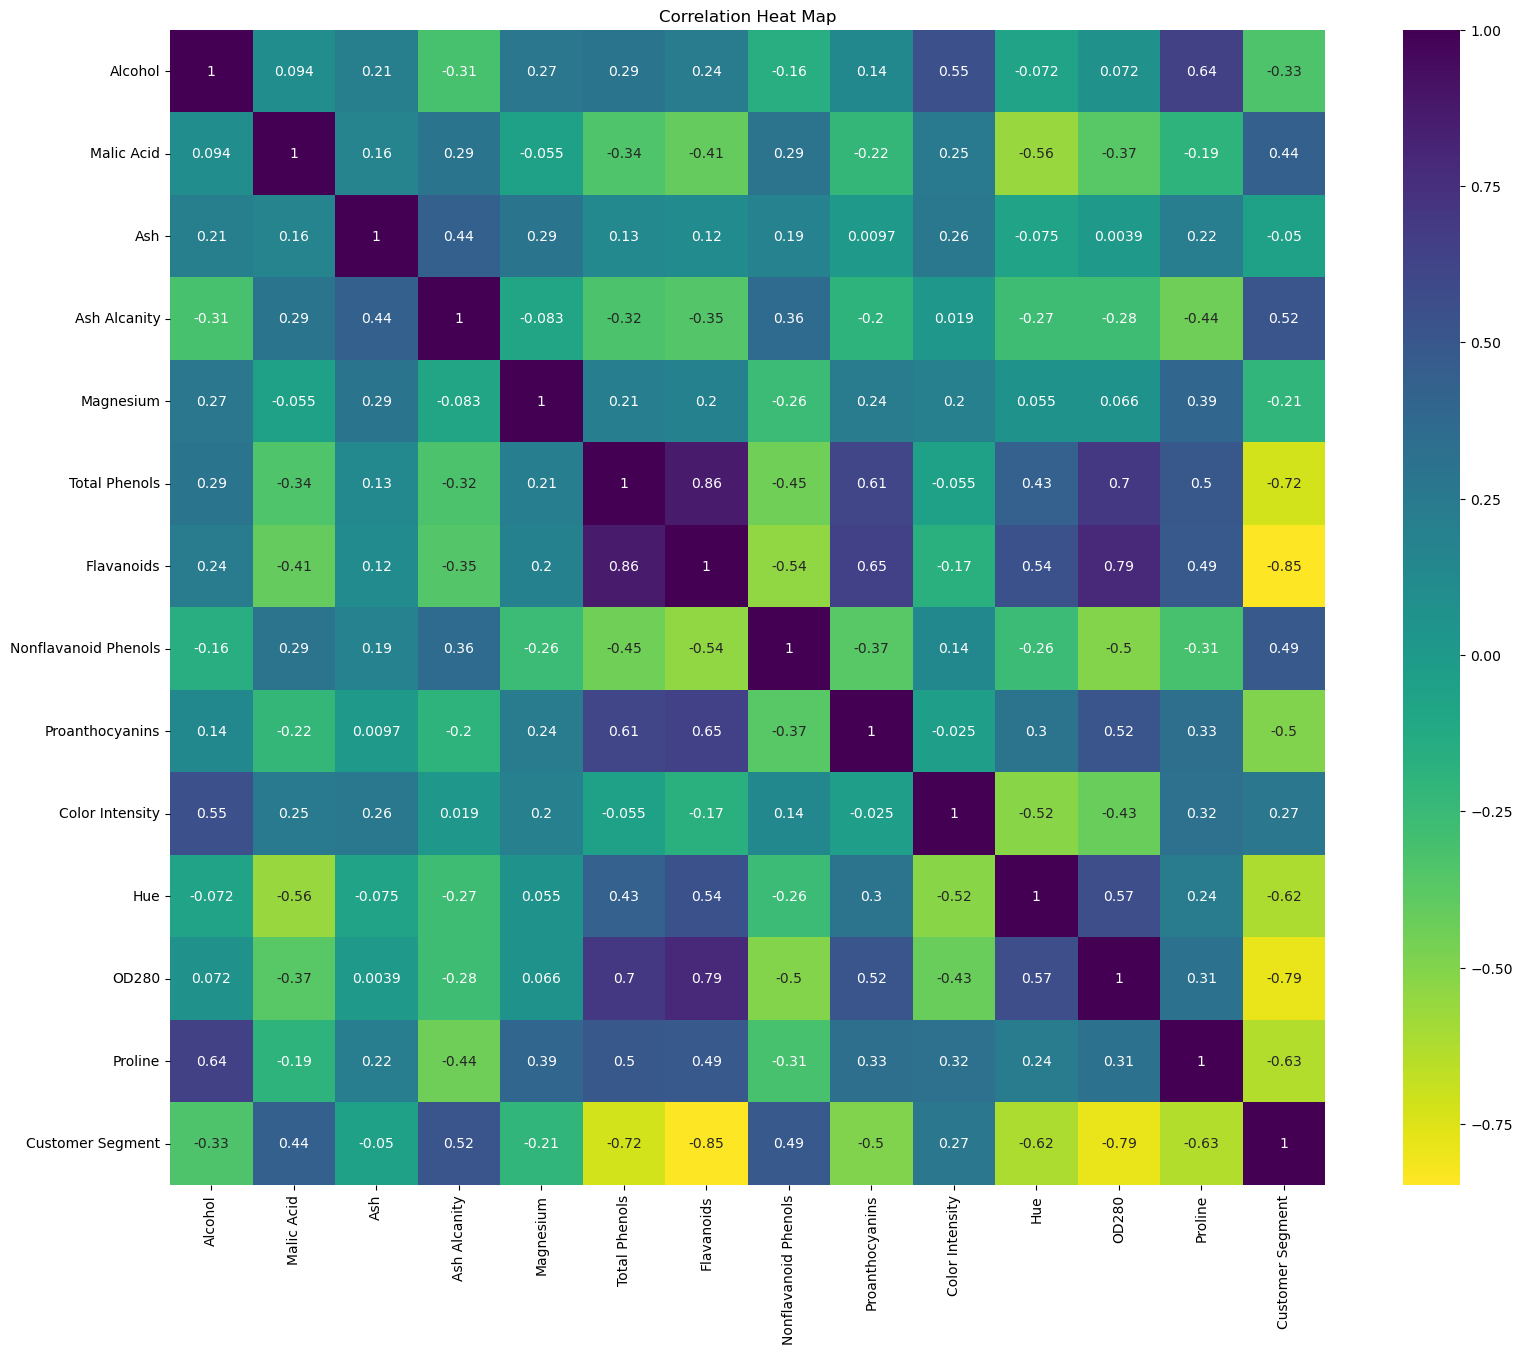

In [9]:
plt.rcParams['figure.figsize']=20,15
sns.heatmap(df.corr(),cmap = 'viridis_r',annot=True,square=True)
plt.title('Correlation Heat Map')
plt.savefig('Correlation Heat Map.png')
plt.show()

_**Assigning the dependent and independent variable**_

In [10]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

## Data Preprocessing:

_**Standardizing the independent variable of the dataset**_

In [11]:
sc=StandardScaler()
x=sc.fit_transform(x)

## Model Fitting:

_**Splitting the dependent variable & independent variable into training and test dataset using train test split**_

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=15)

_**Fitting the Logistic Regression model with the dependent train and independent train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset.**_

In [13]:
log = LogisticRegression()
log.fit(x_train,y_train)
log_pred = log.predict(x_test)
print('Accuracy Score : {}%'.format(100 * accuracy_score(log_pred,y_test)))
print('Confusion Matrix : \n',confusion_matrix(log_pred,y_test))
print('Classification Report : \n',classification_report(log_pred,y_test))

Accuracy Score : 100.0%
Confusion Matrix : 
 [[12  0  0]
 [ 0 12  0]
 [ 0  0 12]]
Classification Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



_**Fitting the Random Forest Classifier model with the dependent train and independent train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset.**_

In [14]:
rf = RandomForestClassifier(n_estimators=24,random_state=10)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print('Accuracy Score : {}%'.format(100 * accuracy_score(rf_pred,y_test)))
print('Confusion Matrix : \n',confusion_matrix(rf_pred,y_test))
print('Classification Report : \n',classification_report(rf_pred,y_test))

Accuracy Score : 97.22222222222221%
Confusion Matrix : 
 [[12  0  0]
 [ 0 12  1]
 [ 0  0 11]]
Classification Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.92      0.96        13
           3       0.92      1.00      0.96        11

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



_**Fitting the Extra Trees Classifier model with the dependent train and independent train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset.**_

In [15]:
et = ExtraTreesClassifier(n_estimators=24,random_state=10)
et=et.fit(x_train,y_train)
et_pred=et.predict(x_test)
print('Accuracy Score : {}%'.format(100 * accuracy_score(et_pred,y_test)))
print('Confusion Matrix : \n',confusion_matrix(et_pred,y_test))
print('Classification Report : \n',classification_report(et_pred,y_test))

Accuracy Score : 100.0%
Confusion Matrix : 
 [[12  0  0]
 [ 0 12  0]
 [ 0  0 12]]
Classification Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



_**Fitting the CatBoost Classifier model with the dependent train and independent train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset.**_

In [16]:
cat = CatBoostClassifier(verbose=0)
cat = cat.fit(x_train,y_train)
cat_pred=cat.predict(x_test)
print('Accuracy Score : {}%'.format(100 * accuracy_score(cat_pred,y_test)))
print('Confusion Matrix : \n',confusion_matrix(cat_pred,y_test))
print('Classification Report : \n',classification_report(cat_pred,y_test))

Accuracy Score : 100.0%
Confusion Matrix : 
 [[12  0  0]
 [ 0 12  0]
 [ 0  0 12]]
Classification Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



_**Fitting the LightGBM Classifier model with the dependent train and independent train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset.**_

In [17]:
lgb = LGBMClassifier()
lgb = lgb.fit(x_train,y_train)
lgb_pred=lgb.predict(x_test)
print('Accuracy Score : {}%'.format(100 * accuracy_score(lgb_pred,y_test)))
print('Confusion Matrix : \n',confusion_matrix(lgb_pred,y_test))
print('Classification Report : \n',classification_report(lgb_pred,y_test))

Accuracy Score : 100.0%
Confusion Matrix : 
 [[12  0  0]
 [ 0 12  0]
 [ 0  0 12]]
Classification Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## Dimensional Reduction:

_**Processing independent variable with Principal Component Analysis to get the importance of all the columns in the independent variable and displaying the numeric value for the importances of columns of the independent variable**_

In [18]:
pca = PCA()
pca_x = pca.fit_transform(x)
display(pca.explained_variance_ratio_)

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

_**Splitting the dependent variable & independent variable into  PCA training and PCA test dataset using train test split of the independent variable**_

In [19]:
pca_x_train,pca_x_test,y_train,y_test =train_test_split(pca_x,y,test_size=0.2,random_state=15)

_**Fitting the Logistic Regression model with the dependent PCA train and independent PCA train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset.**_

In [20]:
pca_log = LogisticRegression()
pca_log.fit(pca_x_train,y_train)
pca_log_pred = pca_log.predict(pca_x_test)
print('Accuracy Score : {}%'.format(100 * accuracy_score(pca_log_pred,y_test)))
print('Confusion Matrix : \n',confusion_matrix(pca_log_pred,y_test))
print('Classification Report : \n',classification_report(pca_log_pred,y_test))

Accuracy Score : 100.0%
Confusion Matrix : 
 [[12  0  0]
 [ 0 12  0]
 [ 0  0 12]]
Classification Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



_**Fitting the Random Forest Classifier model with the dependent PCA train and independent PCA train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset.**_

In [21]:
pca_rf = RandomForestClassifier(n_estimators=24,random_state=10)
pca_rf.fit(pca_x_train,y_train)
pca_rf_pred=pca_rf.predict(pca_x_test)
print('Accuracy Score : {}%'.format(100 * accuracy_score(pca_rf_pred,y_test)))
print('Confusion Matrix : \n',confusion_matrix(pca_rf_pred,y_test))
print('Classification Report : \n',classification_report(pca_rf_pred,y_test))

Accuracy Score : 97.22222222222221%
Confusion Matrix : 
 [[12  1  0]
 [ 0 11  0]
 [ 0  0 12]]
Classification Report : 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        13
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



_**Fitting the Extra Trees Classifier model with the dependent PCA train and independent PCA train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset.**_

In [22]:
pca_et = ExtraTreesClassifier(n_estimators=24,random_state=10)
pca_et=pca_et.fit(pca_x_train,y_train)
pca_et_pred=pca_et.predict(pca_x_test)
print('Accuracy Score : {}%'.format(100 * accuracy_score(pca_et_pred,y_test)))
print('Confusion Matrix : \n',confusion_matrix(pca_et_pred,y_test))
print('Classification Report : \n',classification_report(pca_et_pred,y_test))

Accuracy Score : 100.0%
Confusion Matrix : 
 [[12  0  0]
 [ 0 12  0]
 [ 0  0 12]]
Classification Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



_**Fitting the CatBoost Classifier model with the dependent PCA train and independent PCA train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset.**_

In [23]:
pca_cat = CatBoostClassifier(verbose=0)
pca_cat = pca_cat.fit(pca_x_train,y_train)
pca_cat_pred=pca_cat.predict(pca_x_test)
print('Accuracy Score : {}%'.format(100 * accuracy_score(pca_cat_pred,y_test)))
print('Confusion Matrix : \n',confusion_matrix(pca_cat_pred,y_test))
print('Classification Report : \n',classification_report(pca_cat_pred,y_test))

Accuracy Score : 97.22222222222221%
Confusion Matrix : 
 [[12  1  0]
 [ 0 11  0]
 [ 0  0 12]]
Classification Report : 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        13
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



_**Fitting the LightGBM Classifier model with the dependent PCA train and independent PCA train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset.**_

In [24]:
pca_lgb = LGBMClassifier()
pca_lgb = pca_lgb.fit(pca_x_train,y_train)
pca_lgb_pred=pca_lgb.predict(pca_x_test)
print('Accuracy Score : {}%'.format(100 * accuracy_score(pca_lgb_pred,y_test)))
print('Confusion Matrix : \n',confusion_matrix(pca_lgb_pred,y_test))
print('Classification Report : \n',classification_report(pca_lgb_pred,y_test))

Accuracy Score : 94.44444444444444%
Confusion Matrix : 
 [[12  1  0]
 [ 0 11  1]
 [ 0  0 11]]
Classification Report : 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        13
           2       0.92      0.92      0.92        12
           3       0.92      1.00      0.96        11

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



_**Processing independent variable with Principal Component Analysis of 2 components to get the importance of all the columns in the independent variable and displaying the numeric value for the importances of columns of the independent variable after reducing its dimensions**_

In [25]:
pca1 = PCA (n_components=2)
pca_x1 = pca1.fit_transform(x)
display(pca1.explained_variance_ratio_)

array([0.36198848, 0.1920749 ])

_**Splitting the dependent variable & independent variable into training and test dataset using train test split after reducing the dimensions of the independent variable**_

In [26]:
pca_x1_train,pca_x1_test,y_train,y_test =train_test_split(pca_x1,y,test_size=0.2,random_state=15)

_**Fitting the Logistic Regression model with the dependent train and independent train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset, after reducing the dimensions of the independent variable.**_

In [27]:
pca_log1 = LogisticRegression()
pca_log1.fit(pca_x1_train,y_train)
pca_log_pred1 = pca_log1.predict(pca_x1_test)
print('Accuracy Score : {}%'.format(100 * accuracy_score(pca_log_pred1,y_test)))
print('Confusion Matrix : \n',confusion_matrix(pca_log_pred1,y_test))
print('Classification Report : \n',classification_report(pca_log_pred1,y_test))

Accuracy Score : 97.22222222222221%
Confusion Matrix : 
 [[12  1  0]
 [ 0 11  0]
 [ 0  0 12]]
Classification Report : 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        13
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



_**Fitting the Random Forest Classifier model with the dependent train and independent train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset, after reducing the dimensions of the independent variable.**_

In [28]:
pca_rf1 = RandomForestClassifier(n_estimators=24,random_state=10)
pca_rf1.fit(pca_x1_train,y_train)
pca_rf_pred1=pca_rf1.predict(pca_x1_test)
print('Accuracy Score : {}%'.format(100 * accuracy_score(pca_rf_pred1,y_test)))
print('Confusion Matrix : \n',confusion_matrix(pca_rf_pred1,y_test))
print('Classification Report : \n',classification_report(pca_rf_pred1,y_test))

Accuracy Score : 91.66666666666666%
Confusion Matrix : 
 [[12  2  0]
 [ 0 10  1]
 [ 0  0 11]]
Classification Report : 
               precision    recall  f1-score   support

           1       1.00      0.86      0.92        14
           2       0.83      0.91      0.87        11
           3       0.92      1.00      0.96        11

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



_**Fitting the Extra Trees Classifier model with the dependent train and independent train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset, after reducing the dimensions of the independent variable.**_

In [29]:
pca_et1 = ExtraTreesClassifier(n_estimators=24,random_state=10)
pca_et1=pca_et1.fit(pca_x1_train,y_train)
pca_et_pred1=pca_et1.predict(pca_x1_test)
print('Accuracy Score : {}%'.format(100 * accuracy_score(pca_et_pred1,y_test)))
print('Confusion Matrix : \n',confusion_matrix(pca_et_pred1,y_test))
print('Classification Report : \n',classification_report(pca_et_pred1,y_test))

Accuracy Score : 91.66666666666666%
Confusion Matrix : 
 [[12  2  0]
 [ 0 10  1]
 [ 0  0 11]]
Classification Report : 
               precision    recall  f1-score   support

           1       1.00      0.86      0.92        14
           2       0.83      0.91      0.87        11
           3       0.92      1.00      0.96        11

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



_**Fitting the CatBoost Classifier model with the dependent train and independent train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset, after reducing the dimensions of the independent variable.**_

In [30]:
pca_cat1 = CatBoostClassifier(verbose=0)
pca_cat1 = pca_cat1.fit(pca_x1_train,y_train)
pca_cat_pred1=pca_cat1.predict(pca_x1_test)
print('Accuracy Score : {}%'.format(100 * accuracy_score(pca_cat_pred1,y_test)))
print('Confusion Matrix : \n',confusion_matrix(pca_cat_pred1,y_test))
print('Classification Report : \n',classification_report(pca_cat_pred1,y_test))

Accuracy Score : 88.88888888888889%
Confusion Matrix : 
 [[12  2  0]
 [ 0 10  2]
 [ 0  0 10]]
Classification Report : 
               precision    recall  f1-score   support

           1       1.00      0.86      0.92        14
           2       0.83      0.83      0.83        12
           3       0.83      1.00      0.91        10

    accuracy                           0.89        36
   macro avg       0.89      0.90      0.89        36
weighted avg       0.90      0.89      0.89        36



_**Fitting the LightGBM Classifier model with the dependent train and independent train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset, after reducing the dimensions of the independent variable.**_

In [31]:
pca_lgb1 = LGBMClassifier()
pca_lgb1 = pca_lgb1.fit(pca_x1_train,y_train)
pca_lgb_pred1=pca_lgb1.predict(pca_x1_test)
print('Accuracy Score : {}%'.format(100 * accuracy_score(pca_lgb_pred1,y_test)))
print('Confusion Matrix : \n',confusion_matrix(pca_lgb_pred1,y_test))
print('Classification Report : \n',classification_report(pca_lgb_pred1,y_test))

Accuracy Score : 88.88888888888889%
Confusion Matrix : 
 [[12  2  0]
 [ 0 10  2]
 [ 0  0 10]]
Classification Report : 
               precision    recall  f1-score   support

           1       1.00      0.86      0.92        14
           2       0.83      0.83      0.83        12
           3       0.83      1.00      0.91        10

    accuracy                           0.89        36
   macro avg       0.89      0.90      0.89        36
weighted avg       0.90      0.89      0.89        36



_**For reducing the dimensions of the independent variable using Linear Discriminant Analysis processing both independent variable and dependent variable and displaying the numeric value for the importances of columns of the independent variable after reducing its dimensions**_

In [32]:
lda = LDA()
lda_x = lda.fit_transform(x,y)
lda.explained_variance_ratio_

array([0.68747889, 0.31252111])

_**Splitting the dependent variable & independent variable into training and test dataset using train test split after reducing the dimensions of the independent variable**_

In [33]:
lda_x_train,lda_x_test,y_train,y_test =train_test_split(lda_x,y,test_size=0.2,random_state=15)

_**Fitting the Logistic Regression model with the dependent train and independent train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset, after reducing the dimensions of the independent variable.**_

In [34]:
lda_log = LogisticRegression()
lda_log.fit(lda_x_train,y_train)
lda_log_pred = lda_log.predict(lda_x_test)
print('Accuracy Score : {}%'.format(100 * accuracy_score(lda_log_pred,y_test)))
print('Confusion Matrix : \n',confusion_matrix(lda_log_pred,y_test))
print('Classification Report : \n',classification_report(lda_log_pred,y_test))

Accuracy Score : 100.0%
Confusion Matrix : 
 [[12  0  0]
 [ 0 12  0]
 [ 0  0 12]]
Classification Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



_**Fitting the Random Forest Classifier model with the dependent train and independent train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset, after reducing the dimensions of the independent variable.**_

In [35]:
lda_rf = RandomForestClassifier(n_estimators=24,random_state=10)
lda_rf.fit(lda_x_train,y_train)
lda_rf_pred=lda_rf.predict(lda_x_test)
print('Accuracy Score : {}%'.format(100 * accuracy_score(lda_rf_pred,y_test)))
print('Confusion Matrix : \n',confusion_matrix(lda_rf_pred,y_test))
print('Classification Report : \n',classification_report(lda_rf_pred,y_test))

Accuracy Score : 100.0%
Confusion Matrix : 
 [[12  0  0]
 [ 0 12  0]
 [ 0  0 12]]
Classification Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



_**Fitting the Extra Trees Classifier model with the dependent train and independent train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset, after reducing the dimensions of the independent variable.**_

In [36]:
lda_et = ExtraTreesClassifier(n_estimators=24,random_state=10)
lda_et=lda_et.fit(lda_x_train,y_train)
lda_et_pred=lda_et.predict(lda_x_test)
print('Accuracy Score : {}%'.format(100 * accuracy_score(lda_et_pred,y_test)))
print('Confusion Matrix : \n',confusion_matrix(lda_et_pred,y_test))
print('Classification Report : \n',classification_report(lda_et_pred,y_test))

Accuracy Score : 100.0%
Confusion Matrix : 
 [[12  0  0]
 [ 0 12  0]
 [ 0  0 12]]
Classification Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



_**Fitting the CatBoost Classifier model with the dependent train and independent train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset, after reducing the dimensions of the independent variable.**_

In [37]:
lda_cat = CatBoostClassifier(verbose=0)
lda_cat = lda_cat.fit(lda_x_train,y_train)
lda_cat_pred=lda_cat.predict(lda_x_test)
print('Accuracy Score : {}%'.format(100 * accuracy_score(lda_cat_pred,y_test)))
print('Confusion Matrix : \n',confusion_matrix(lda_cat_pred,y_test))
print('Classification Report : \n',classification_report(lda_cat_pred,y_test))

Accuracy Score : 100.0%
Confusion Matrix : 
 [[12  0  0]
 [ 0 12  0]
 [ 0  0 12]]
Classification Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



_**Fitting the LightGBM Classifier model with the dependent train and independent train variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset, after reducing the dimensions of the independent variable.**_

In [38]:
lda_lgb = LGBMClassifier()
lda_lgb = lda_lgb.fit(lda_x_train,y_train)
lda_lgb_pred=lda_lgb.predict(lda_x_test)
print('Accuracy Score : {}%'.format(100 * accuracy_score(lda_lgb_pred,y_test)))
print('Confusion Matrix : \n',confusion_matrix(lda_lgb_pred,y_test))
print('Classification Report : \n',classification_report(lda_lgb_pred,y_test))

Accuracy Score : 94.44444444444444%
Confusion Matrix : 
 [[12  1  0]
 [ 0 11  1]
 [ 0  0 11]]
Classification Report : 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        13
           2       0.92      0.92      0.92        12
           3       0.92      1.00      0.96        11

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



_**Create the pickle files of the models with the highest accuracy score with the model names**_

In [39]:
pickle.dump(lda_log,open('Logistic Regression','wb'))
pickle.dump(lda_rf,open('Random Forest','wb'))
pickle.dump(lda_et,open('Extra Trees','wb'))
pickle.dump(lda_cat,open('Cat Boost','wb'))